### A demo of the principal component analysis with the MNIST dataset

#### Developed for the Austin ACM SIGKDD meetup
#### Emma Yu, Feb 8, 2017

### 1. Introduction

We explore PCA with the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits. The dataset contains 70,000 28*28 images, and they are split into a training set of 42,000 images and a testing set of 28,000 images. 

First let's load the dataset and other useful pacakges. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import rcParams 
from matplotlib.pyplot import imshow 
import matplotlib.pyplot as plt
%matplotlib inline
rcParams['figure.figsize'] = (8., 10.0) 

/Users/emmayu/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
names = train.keys()
print names

Index([u'label', u'pixel0', u'pixel1', u'pixel2', u'pixel3', u'pixel4',
       u'pixel5', u'pixel6', u'pixel7', u'pixel8',
       ...
       u'pixel774', u'pixel775', u'pixel776', u'pixel777', u'pixel778',
       u'pixel779', u'pixel780', u'pixel781', u'pixel782', u'pixel783'],
      dtype='object', length=785)


We can see the 2D images have already been flatten into 1D. Each row of the dataframe contains 784 pixel values and the true value of the digit in the image (label). For the ease of later processing, let's separate them and convert the data into numpy arrays. 

In [4]:
# split the data into labels and images and convert them into numpy arrays 
traindata = pd.DataFrame.as_matrix(train[names[1:]])
trainlabel = pd.Series.as_matrix(train[names[0]])

print 'training data shape', traindata.shape

testdata = pd.DataFrame.as_matrix(test)
print 'testing datashape', testdata.shape

training data shape (42000, 784)
testing datashape (28000, 784)


Let's plot the first 25 images to have a quick look of the data.

In [5]:
def plotdigits(data, nrow, ncol):    
    fig, ax = plt.subplots(nrow,ncol)
    for i, a in enumerate(ax.flatten()):
        a.imshow(data[i,:].reshape((28,28)))
    plt.show()
    return

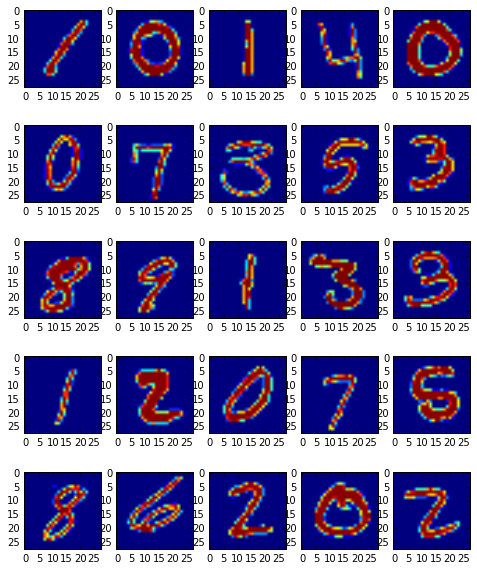

In [6]:
plotdigits(traindata, 5, 5)

If we plot a histogram of the training labels, we can see the data is generally evenly distributed in each catergory.

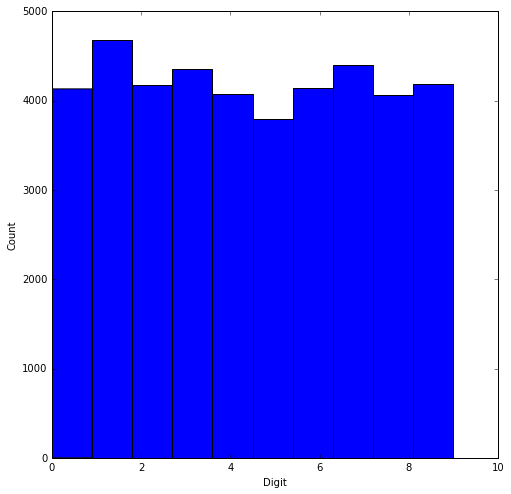

In [23]:
plt.hist(trainlabel)
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

### 2. Preprosessing

PCA assumes data is centered around zero, so we want to subtract the mean pixel values across all images. We also want to make sure that we subtract the same values for the training and testing data. Since the pixel values are all in the same range, we do not need to worry about different scaling of the variables.  

In [7]:
# subtract the mean image 
meanimage = traindata.mean(axis=0)

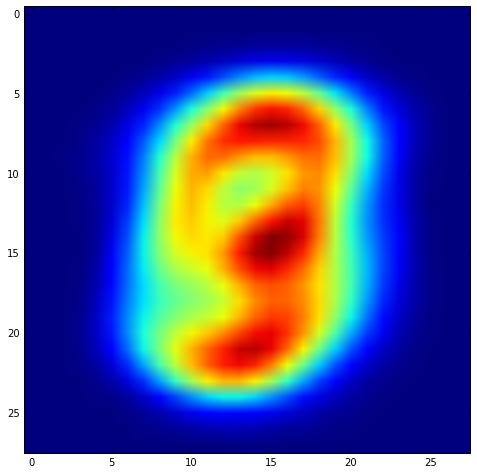

In [8]:
# plot the mean image
plt.imshow(meanimage.reshape((28,28)))
plt.show()


In [9]:
traindata = np.subtract(traindata, meanimage)
testdata = np.subtract(testdata, meanimage)

Let's look at the first 25 images of the training data again after subtracking the mean.

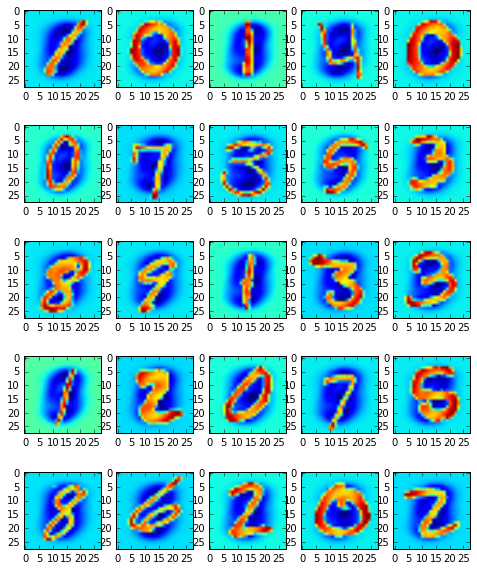

In [10]:
plotdigits(traindata, 5, 5)

### 3. Find the principal components and transfrom data into the principal space

We use the PCA module in Scikit learn to find the principal components from the training data.

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(traindata)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
def niceplot(data, xlabel, ylabel, title):
    rcParams['figure.figsize'] = (8., 8.0) 
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(data, linewidth=2)
    ax.tick_params(labelsize=22)
    ax.set_xlabel(xlabel, fontsize=25)
    ax.set_ylabel(ylabel, fontsize=25)
    #f, axarr = plt.subplots(2)
    ax.set_title(title, fontsize=25)
    plt.show()
    return

We plot the fraction of variance explained by each principal components. We can see the variance explained by each component drops significantly for later principle components. More than 90% of the total variance is explained by the first 100 principal components.

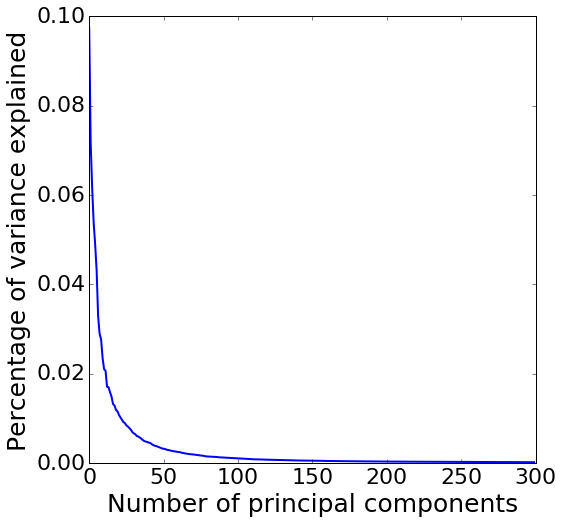

In [13]:
niceplot(pca.explained_variance_ratio_[:300], 'Number of principal components', 
         'Percentage of variance explained', '')

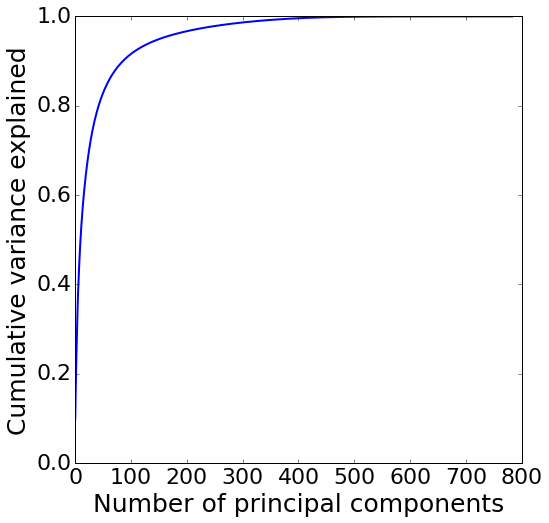

In [14]:
niceplot(np.cumsum(pca.explained_variance_ratio_), 'Number of principal components', 
         'Cumulative variance explained', '')


In [15]:
def plotpca(pcaname, nrow, ncol):
    fig, ax = plt.subplots(nrow,ncol)
    for i, a in enumerate(ax.flatten()):
        a.imshow(pcaname.components_[i,:].reshape((28,28)))
    plt.show() 
    return

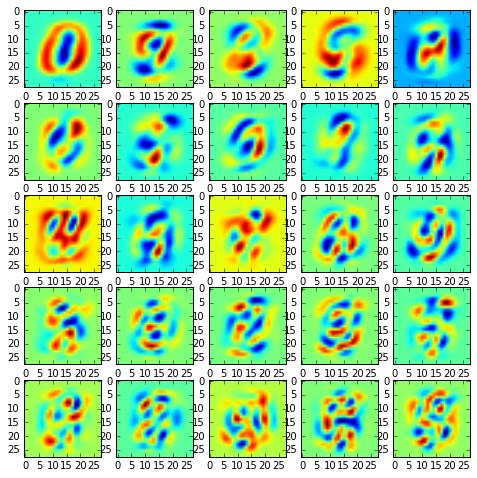

In [16]:
plotpca(pca, 5, 5)

### 4. Reconstructing the images
Let's keep the 30, 50, and 100 principal components and see how well we can reconstruct the data.

In [17]:
def reconstruct(data, visdata, ncomp):
    pca = PCA(n_components=ncomp)
    pca.fit(data)
    pca_visdata = pca.transform(visdata)
    recon_visdata = pca.inverse_transform(pca_visdata)
    return pca, recon_visdata

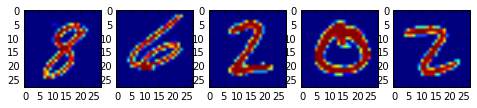

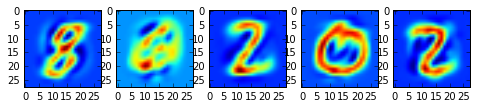

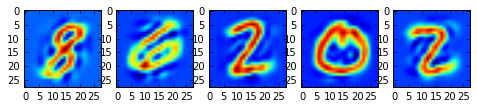

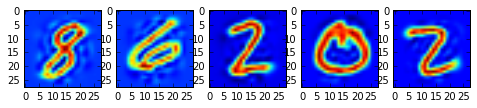

In [22]:
train_reconst = np.add(traindata[:25,:], meanimage)
plotdigits(train_reconst[20:], 1, 5)

numcomp = [30, 50, 100]
for num in numcomp:
    # Calculate the principal components. Transform and reconstruct the first 25 images
    pca_num, recon_num = reconstruct(traindata, traindata[:25,:], num)
    # add the mean image back
    recon_num = np.add(recon_num, meanimage)
    # plot the first 5 images
    plotdigits(recon_num[20:], 1, 5)